In [1]:
# Download all the libraries and packages needed
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [3]:
# loading cherry_blossoms dataset
ds = tfds.load("cherry_blossoms", split='train')
ds

<_PrefetchDataset element_spec={'doy': TensorSpec(shape=(), dtype=tf.float32, name=None), 'temp': TensorSpec(shape=(), dtype=tf.float32, name=None), 'temp_lower': TensorSpec(shape=(), dtype=tf.float32, name=None), 'temp_upper': TensorSpec(shape=(), dtype=tf.float32, name=None), 'year': TensorSpec(shape=(), dtype=tf.int32, name=None)}>

In [4]:
# Convert tf.data.cherry_blossoms to a panda dataframe
df = tfds.as_dataframe(ds)
df.head()

,doy,temp,temp_lower,temp_upper,year
0,NaN,6.46,4.76,8.16,1300
1,105.0,5.63,4.90,6.37,1638
2,109.0,5.81,4.68,6.95,1347
3,104.0,5.70,4.87,6.53,1187
4,107.0,6.20,5.31,7.09,1617


In [9]:
# list of the dataframe shape, size and other info
df.info()

<class 'tensorflow_datasets.core.as_dataframe.as_dataframe.<locals>.StyledDataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   doy         827 non-null    float32
 1   temp        1124 non-null   float32
 2   temp_lower  1124 non-null   float32
 3   temp_upper  1124 non-null   float32
 4   year        1215 non-null   int32  
dtypes: float32(4), int32(1)
memory usage: 23.9 KB


In [10]:
# Dataset analysis
df.describe()

,doy,temp,temp_lower,temp_upper,year
count,827.000000,1124.000000,1124.000000,1124.000000,1215.000000
mean,104.540504,6.141886,5.098941,7.185151,1408.000000
std,6.407036,0.663648,0.850350,0.992921,350.884596
min,86.000000,4.670000,0.750000,5.450000,801.000000
25%,100.000000,5.700000,4.610000,6.480000,1104.500000
50%,105.000000,6.100000,5.145000,7.040000,1408.000000
75%,109.000000,6.530000,5.542500,7.720000,1711.500000
max,124.000000,8.300000,7.740000,12.100000,2015.000000


In [14]:
# Drop all not needed feauters
df = df.drop(columns=['doy', 'temp_upper', 'year'])
df.head()

,temp,temp_lower
0,6.46,4.76
1,5.63,4.90
2,5.81,4.68
3,5.70,4.87
4,6.20,5.31


In [15]:
# CaLculating Correlation
df.corr()

,temp,temp_lower
temp,1.000000,0.663891
temp_lower,0.663891,1.000000


In [17]:
# Correlation between all pairs
# Pair of least correlation (-0.499087) - is the pair year-temp_upper 
# Pair of highest correlation (0.767866) - is the pair temp-temp_upper 
corrDF = tfds.as_dataframe(ds)
corrDF.corr()

,doy,temp,temp_lower,temp_upper,year
doy,1.000000,-0.326976,-0.271967,-0.294773,-0.052139
temp,-0.326976,1.000000,0.663891,0.767866,-0.066062
temp_lower,-0.271967,0.663891,1.000000,0.030739,0.479762
temp_upper,-0.294773,0.767866,0.030739,1.000000,-0.499087
year,-0.052139,-0.066062,0.479762,-0.499087,1.000000


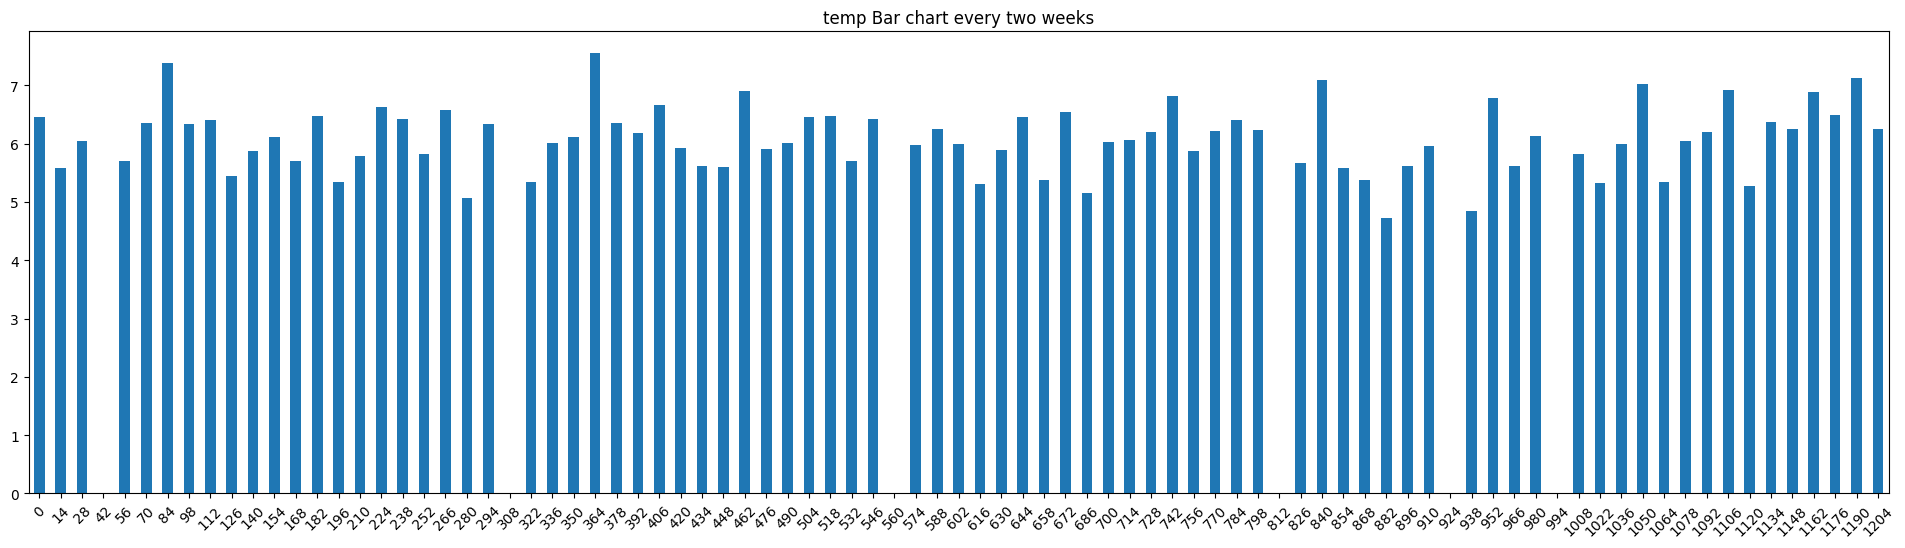

In [30]:
# Bar chart for independant variable temp
subset_df = df[::14]  # Select every 14th row (2 weeks)
plt.figure(figsize=(24, 6))  # Set the figure size (width=12, height=6)

# Create a bar plot of the 'temp' column from subset_df
subset_df['temp'].plot.bar(title='temp Bar chart every two weeks')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.show()

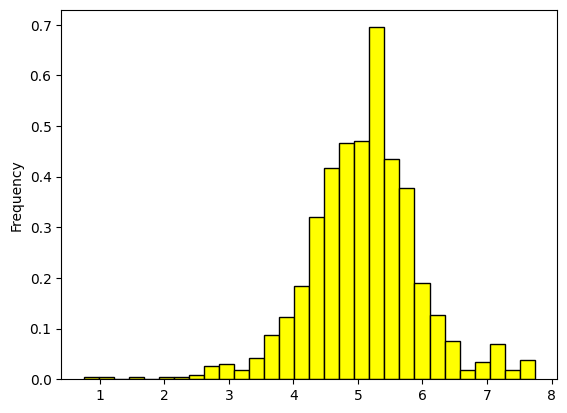

In [36]:
# Empirical distribution function for dependant variable temp_lower
df['temp_lower'].plot.hist(color='yellow', edgecolor='black', bins=30, density=True);

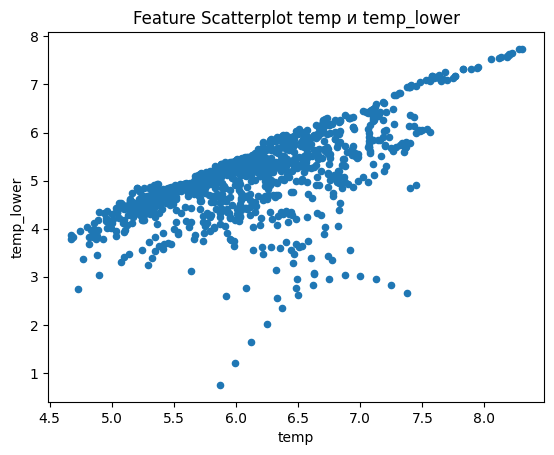

In [37]:
# Feature Scatterplot for temp and temp_lower
df.plot.scatter('temp','temp_lower',title='Feature Scatterplot temp и temp_lower');

In [42]:
print(np.min(df['temp_lower']))
print(np.max(df['temp_lower']))
print(np.mean(df['temp_lower']))

0.75
7.74
5.0989413


In [40]:
df['temp_lower'].shape

(1215,)

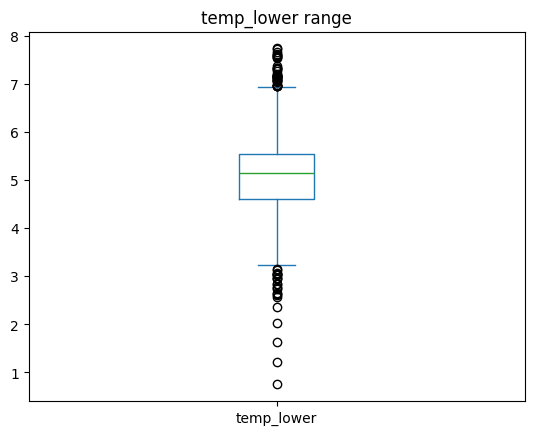

In [43]:
# We can see that we have a few outlier points that we need to remove
df['temp_lower'].plot.box(title='temp_lower range');

In [48]:
# Filter 'temp' column
df['temp'] = df['temp'][df['temp'] < 7]
# Assign filtered values of 'temp_lower' based on 'temp' conditions
df['temp_lower'] = df['temp_lower'][(df['temp'] < 3.5) & (df['temp'] < 7)]

df['temp'].shape, df['temp_lower'].shape

((1215,), (1215,))